Note: thingy.

Current Updates:
- finally found a method to make pretty colors. I spent a whole morning doing this because of sunk cost fallacy and spite.
- should definitely work on a way to track outliers for each category and then compare their attributes against the general pop.


In [3]:
# Libraries for data wrangling and transformation
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
# Libraries for data analysis
import matplotlib.pyplot as plt


# Miscellaneous
from datetime import datetime
from matplotlib import cm
import matplotlib.colors as mcolors

In [4]:
data = pd.read_csv("twitchdata-update.csv")

# Modifying data with extra rows for analysis/cleaning
def convertmh(row):
    n = float(row["Stream time(minutes)"])/60/60
    return n

data["Stream time(days)"] = data.apply(lambda row: convertmh(row),axis = 1)

In [5]:
data

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Stream time(days)
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English,59.791667
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English,58.845833
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese,143.133333
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English,143.816667
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English,34.350000
...,...,...,...,...,...,...,...,...,...,...,...,...
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish,3.766667
996,빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,True,False,Korean,42.500000
997,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean,60.391667
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English,29.095833


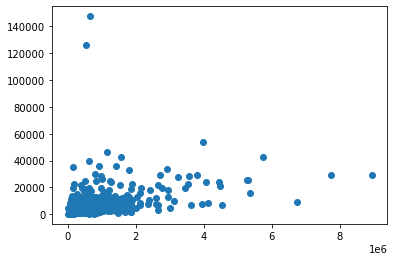

In [19]:
plt.scatter(data["Followers"], data["Average viewers"])

Text(0.5, 1.0, 'Watch time vs. Peak Viewers')

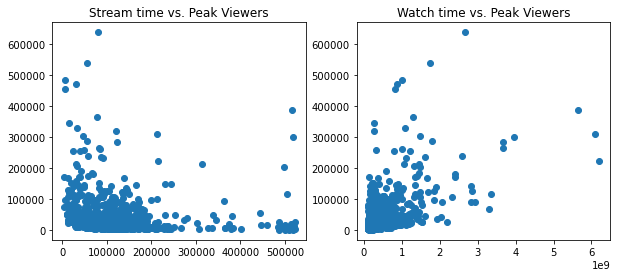

In [46]:
plt.figure(figsize=(10,4))
c1 = plt.subplot(1,2,1)
c1 = plt.scatter(data["Stream time(minutes)"], data["Peak viewers"])
plt.title("Stream time vs. Peak Viewers")
c2 = plt.subplot(1,2,2)
c2 = plt.scatter(data["Watch time(Minutes)"], data["Peak viewers"])
plt.title("Watch time vs. Peak Viewers")

In [6]:
lang = data["Language"].unique()
langs = data.groupby(["Language"])["Channel"].count().sort_values(axis=0,ascending=False)
langs

Language
English       485
Korean         77
Russian        74
Spanish        68
French         66
Portuguese     61
German         49
Chinese        30
Turkish        22
Italian        17
Polish         12
Thai           11
Japanese       10
Czech           6
Arabic          5
Hungarian       2
Other           1
Greek           1
Slovak          1
Finnish         1
Swedish         1
Name: Channel, dtype: int64

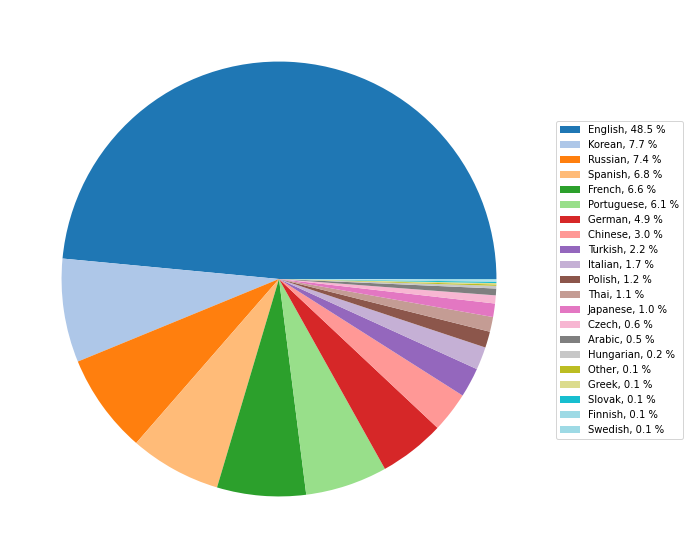

In [7]:
cmap = cm.tab20(np.arange(lang.size))

fig1, ax1 = plt.subplots(figsize=(10,10))
pichart = ax1.pie(langs,colors=cmap)
percents = langs.values * 100 / langs.values.sum()
legend = ['%s, %1.1f %%' % (l, s) for l, s in zip(langs.index,percents)]
plt.legend(labels = legend
           ,bbox_to_anchor=(1,0.8))

Text(0.5, 1.0, 'Followers by Language')

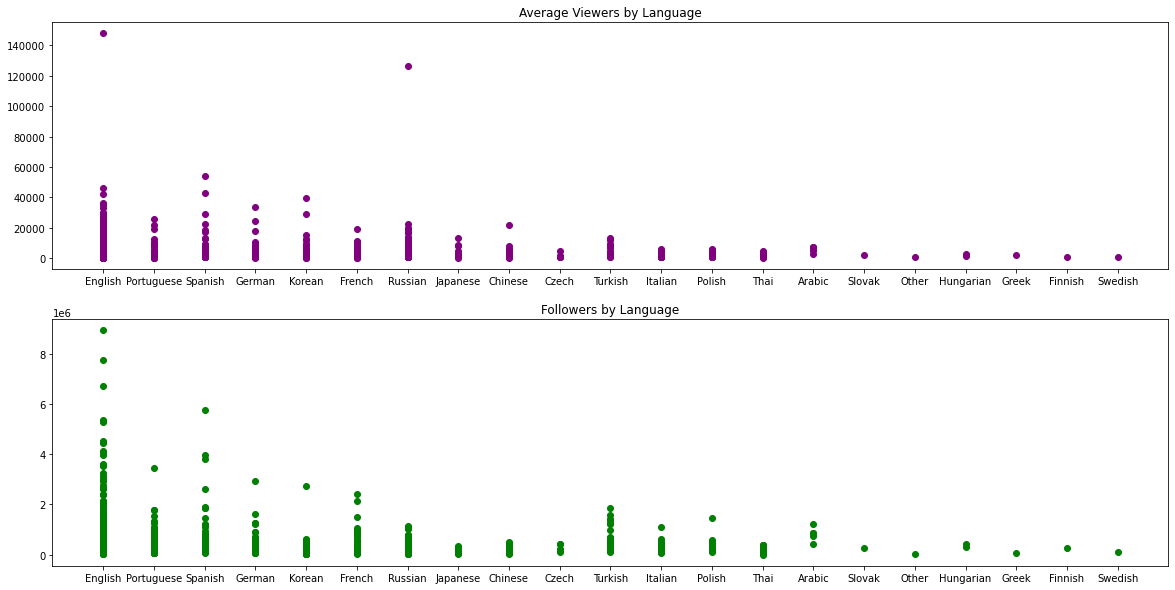

In [288]:
plt.figure(figsize=(20,10))   
l1 = plt.subplot(2,1,1)
l1 = plt.scatter(data["Language"], data["Average viewers"], color = "purple")
plt.title("Average Viewers by Language")
l2 = plt.subplot(2,1,2)
l2 = plt.scatter(data["Language"],data["Followers"],  color = "green")
plt.title("Followers by Language")

Notes:
- viewers and followers appear to be following a similar pattern?
- lmfao whos that one russian channel in the first plot

Text(0.5, 1.0, 'Stream time by Language (days)')

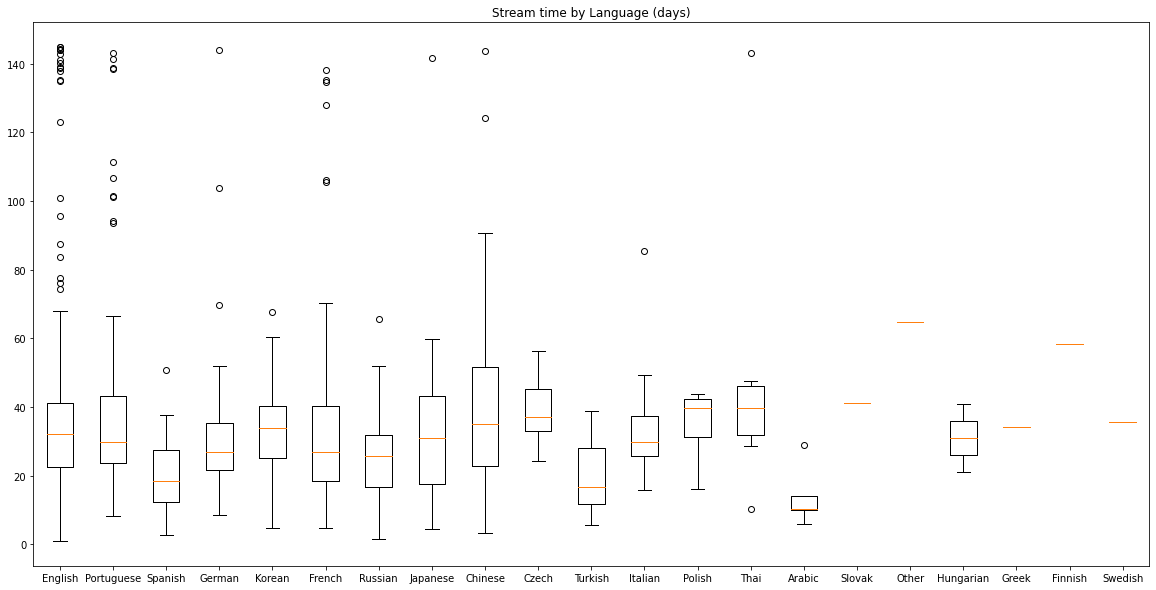

In [8]:

#Creating stream time arrays for each language
st = []
for l in lang:
    ar = []
    ct = data[data["Language"] == l]
    for le in ct["Stream time(days)"]:
        ar.append(le)
    st.append(ar)

plt.figure(figsize=(20,10))
box = plt.boxplot(st,labels=lang)
plt.title("Stream time by Language (days)")

Notes:
- seems like even with the distributions, there's a general mean/trend in terms of stream time. the extremes seem to be more present in the more "populated" languages as expected (more channels = more variation)
- English still has the most "extremes" though it could be balanced out by being the majority (48%)
- Exceptions to this pattern: Thai with this 1 extreme channel despite the low percent

These are just a few that can be used to kickstart analysis

In [12]:
#Observing English as the majority
eng = data[data["Language"] == "English"].sort_values(axis=0,by='Average viewers',ascending=False)
eng

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Stream time(days)
81,dota2ti,1017577605,6315,483530,147643,663297,121422,16228039,True,False,English,1.754167
41,LCS,1461310140,31125,214124,46459,1162746,526244,28313058,True,False,English,8.645833
5,Asmongold,3668799075,82260,263720,42414,1563438,554201,61715781,True,False,English,22.850000
52,RocketLeague,1322448480,33540,206681,36086,1409120,412101,57189129,True,False,English,9.316667
46,LCK,1351758525,37140,171861,36030,934688,307853,28970100,True,False,English,10.316667
...,...,...,...,...,...,...,...,...,...,...,...,...
605,StreamerHouse,199501650,496545,12609,402,630255,10659,2800864,True,False,English,137.929167
641,Speedrun,186800430,500010,16604,375,93358,51098,13863239,True,False,English,138.891667
746,Monstercat,163589370,519675,14261,313,788684,22331,4084222,True,False,English,144.354167
828,MarketTradersTV,148900110,499215,1357,297,30413,12081,981536,True,False,English,138.670833


In [21]:
game_channels = ["Riot","CSGO","dota2","RocketLeague","R6"]

data["Gaming"]

KeyError: 'R6'

In [15]:
c = data[data["Channel"].str.contains("CSGO")]
c

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Stream time(days)
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English,143.816667
346,ESL_CSGOb,325637220,52530,89949,5114,575769,183662,13742820,True,False,English,14.591667
964,ESL_CSGO_FR,126026325,53295,22857,2570,193614,26073,4124889,True,False,French,14.804167
